# BASIC CONFIGURATIONS

In [1]:
### Setup the library ###
import pyrogue as pr
import os, sys
import matplotlib.pyplot as plt
import time
import datetime
import numpy as np
import math
import pprint
import inspect 
top_level=f'{os.getcwd()}/../'
rootTopLevel = top_level+'script/'
pr.addLibraryPath( rootTopLevel )

import setupLibPaths

import ePix320kM as devBoard

args = None

In [2]:
# ONLY RUN ONCE!
# Defining root
# If crashes, make sure the deve is correct.
root =  devBoard.Root(   
        top_level  = top_level,
        dev        = '/dev/datadev_1',
        pollEn     = False,
        initRead   = True,
        pciePgpEn  = True,
        justCtrl   = False,
        DDebugSize = 4000)
root.start()

# example showing a read
AxiVersion = root.Core.AxiVersion
print ( '###################################################')
print ( '#             Firmware Version                    #')
print ( '###################################################')
AxiVersion.printStatus()
print ( '###################################################')

Root.Core.Si5345Pll.Page0.DataBlock.setPollInterval(1)
Start: Started zmqServer on ports 9099-9101
    To start a gui: python -m pyrogue gui --server='localhost:9099'
    To use a virtual client: client = pyrogue.interfaces.VirtualClient(addr='localhost', port=9099)
Root.Core.AxiVersion count reset called
Root.pciePgp.AxiPcieCore.AxiVersion count reset called
###################################################
#             Firmware Version                    #
###################################################
Path         = Root.Core.AxiVersion
FwVersion    = 0x1010700
UpTime       = 2:31:32
GitHash      = 0xd8589bb81a7ac1c46f7fa66b74dd01f2604fd0a6
XilinxDnaId  = 0x400200000139d7204c70e105
FwTarget     = "ePixHRM320k
BuildEnv     = Vivado v2023.1
BuildServer  = rdsrv314 (Ubuntu 20.04.6 LTS)
BuildDate    = Sat 06 Apr 2024 09:28:55 AM PDT
Builder      = dnajjar"
###################################################


In [3]:
run helperFunctions.ipynb

In [4]:
#!python -m pyrogue gui --server='localhost:9099'

In [5]:
probeScratchPad()

0xdeadbeef
0xdeadbeef


In [6]:
# Configure clock to 168 MHz and configures all ASICS
root.InitASIC([4,1,0,1,0])

Rysync ASIC started
Did not find specific ASIC1 file. Using generic.
Did not find specific ASIC2 file. Using generic.
Did not find specific ASIC3 file. Using generic.
Did not find specific ASIC4 file. Using generic.
Init ASIC script started
Loading PLL configuration
Loading supply configuration
Loading /afs/slac.stanford.edu/g/controls/development/users/dnajjar/sandBox/epix-hr-m-320k/software/notebook/..//config/ePixHRM320k_PowerSupply_Enable.yml
Loading lane delay configurations
Loading /afs/slac.stanford.edu/g/controls/development/users/dnajjar/sandBox/epix-hr-m-320k/software/notebook/..//config/ePixHRM320k_cb000018f0322301_SspMonGrp_carrier.yml
Loading waveforms configuration
Loading /afs/slac.stanford.edu/g/controls/development/users/dnajjar/sandBox/epix-hr-m-320k/software/notebook/..//config/ePixHRM320k_RegisterControl.yml
Loading batcher configurations
Loading /afs/slac.stanford.edu/g/controls/development/users/dnajjar/sandBox/epix-hr-m-320k/software/notebook/..//config/ePixHRM32

# Disable full rate receivers for now

In [7]:
root.disableAndCleanAllFullRateDataRcv()
root.enableDataRcv(False)
root.enableDataDebug(False)

In [8]:
#get locked lanes
root.getLaneLocks()

ASIC0: 0xffffff
ASIC1: 0x0
ASIC2: 0x3effff
ASIC3: 0x0


# Clear PGP and DigAsicStrmReg counters

In [9]:
clearUpStreamPpg()
clearDownStreamPpg
clearDigAsicStrmReg()
clearSspMonGrp()
disablePpgFlowCtrl(False)

# Release a number of frames on max rate

In [10]:
ssdPath = "/u1/ePixHRM320k/acquisition"
filename = f"{ssdPath}/maxRate1445.dat"

In [11]:
root.enableAllAsics(True)
#root.enableDataDebug(True)
DEBUG0.cleanData()
DEBUG1.cleanData()
DEBUG2.cleanData()
DEBUG3.cleanData()

frames = 100
rate = 5000

#root.hwTrigger(frames, rate)
root.acquireToFile(filename, frames, rate)

Acquisition started: filename: /u1/ePixHRM320k/acquisition/maxRate1445.dat, rate: 5000, #frames:100
Stop Triggers command executed
Set Auto Trigger command executed
Start Auto Trigger command executed
Triggers sent: 100
Stop Triggers command executed
Received on channel 0 100 frames...
Received on channel 1 100 frames...
Received on channel 2 100 frames...
Received on channel 3 100 frames...
Waiting for file to close...
Acquisition complete and file closed


# Examine pgpcard and DigAsicStrmReg

In [12]:
getUpStreamPpgFrmCnt()
getDownStreamPpgFrmCnt()
getPKREGCounters([1,0,1,0])

Upstream pgp got 100 frames
Upstream pgp got 100 frames
Upstream pgp got 100 frames
Upstream pgp got 100 frames
Downstream pgp got 2600 frames
Downstream pgp got 2600 frames
Downstream pgp got 2600 frames
Downstream pgp got 2600 frames
DigAsicStrmRegister0 FrameCount=100 disable=0x0
DigAsicStrmRegister2 FrameCount=100 disable=0xc10000


In [13]:
readFromFile(filename)

Extracted and descrambled 100 frames
ASIC 0: Extracted 100 frames
ASIC 1: Extracted 100 frames
ASIC 2: Extracted 100 frames
ASIC 3: Extracted 100 frames


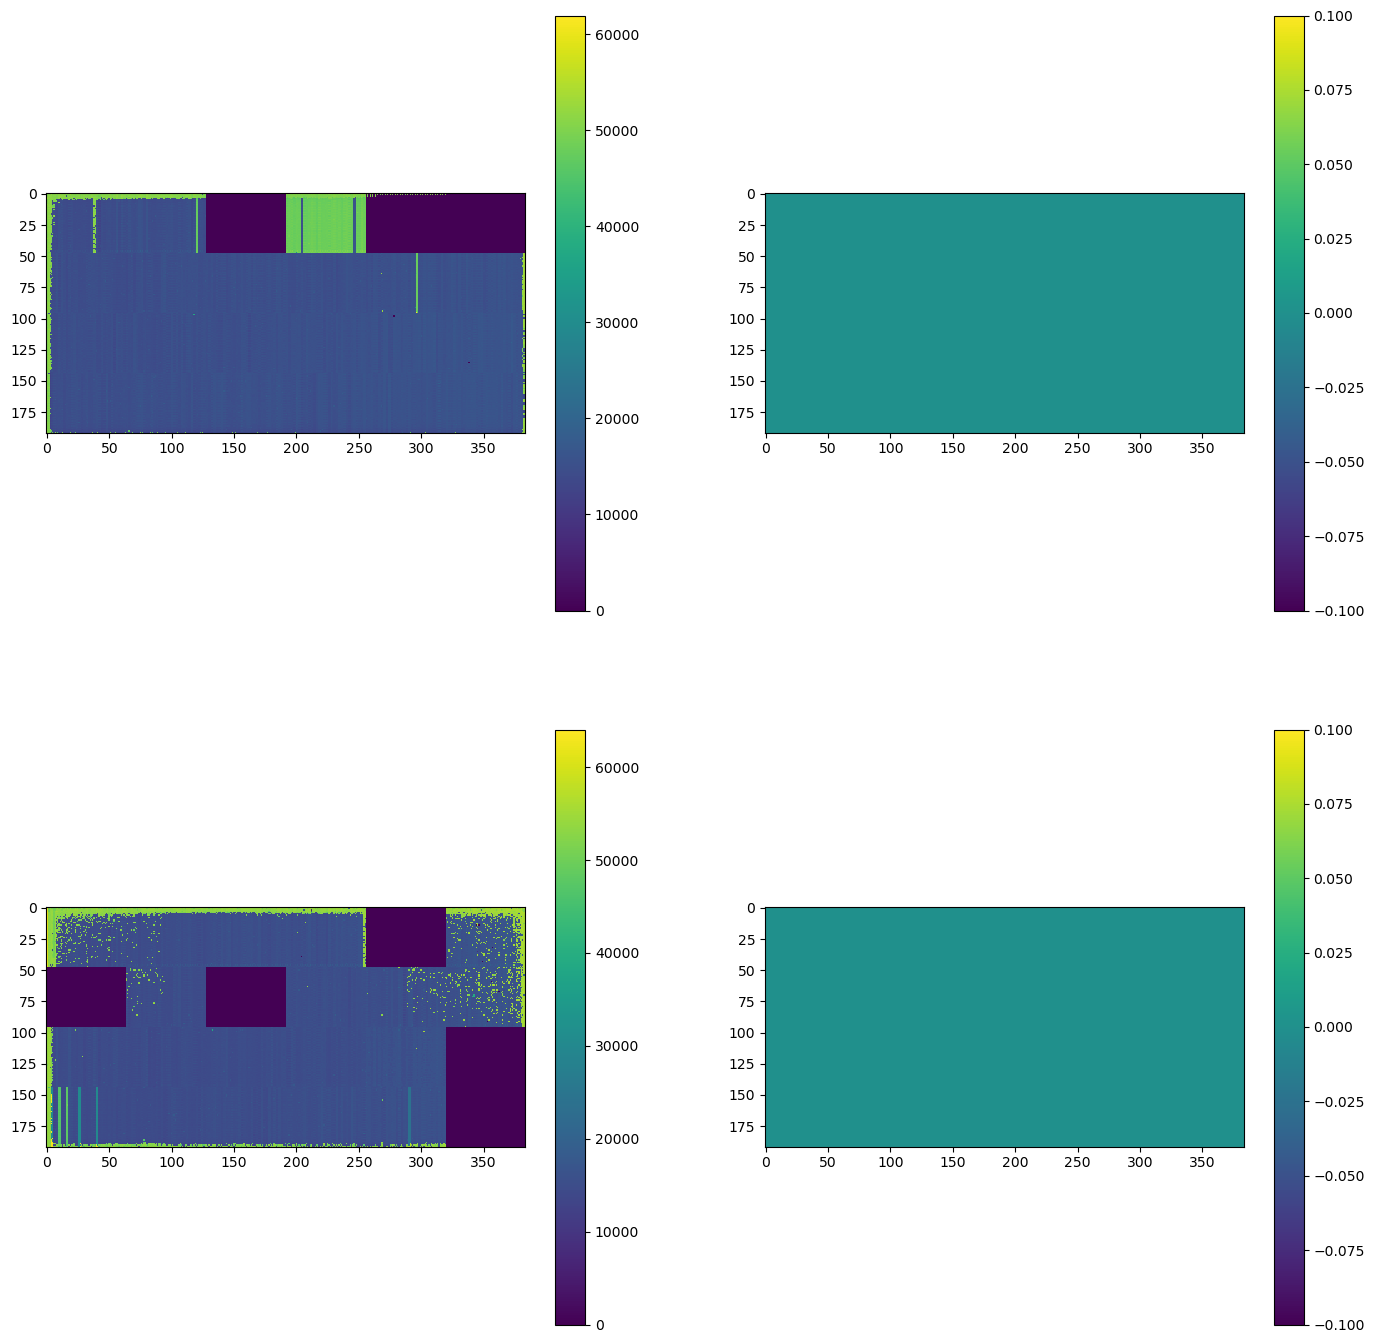

In [15]:
plt.subplots(2,2,figsize=(17,17))
for imageIndex in range(4):
    plt.subplot(2,2,imageIndex+1)
     
    plt.imshow(readerReceiver[imageIndex].getData()[:,:,0], interpolation='nearest')
    #plt.xlabel("ASIC {} frame 0".format(imageIndex))
    plt.colorbar()

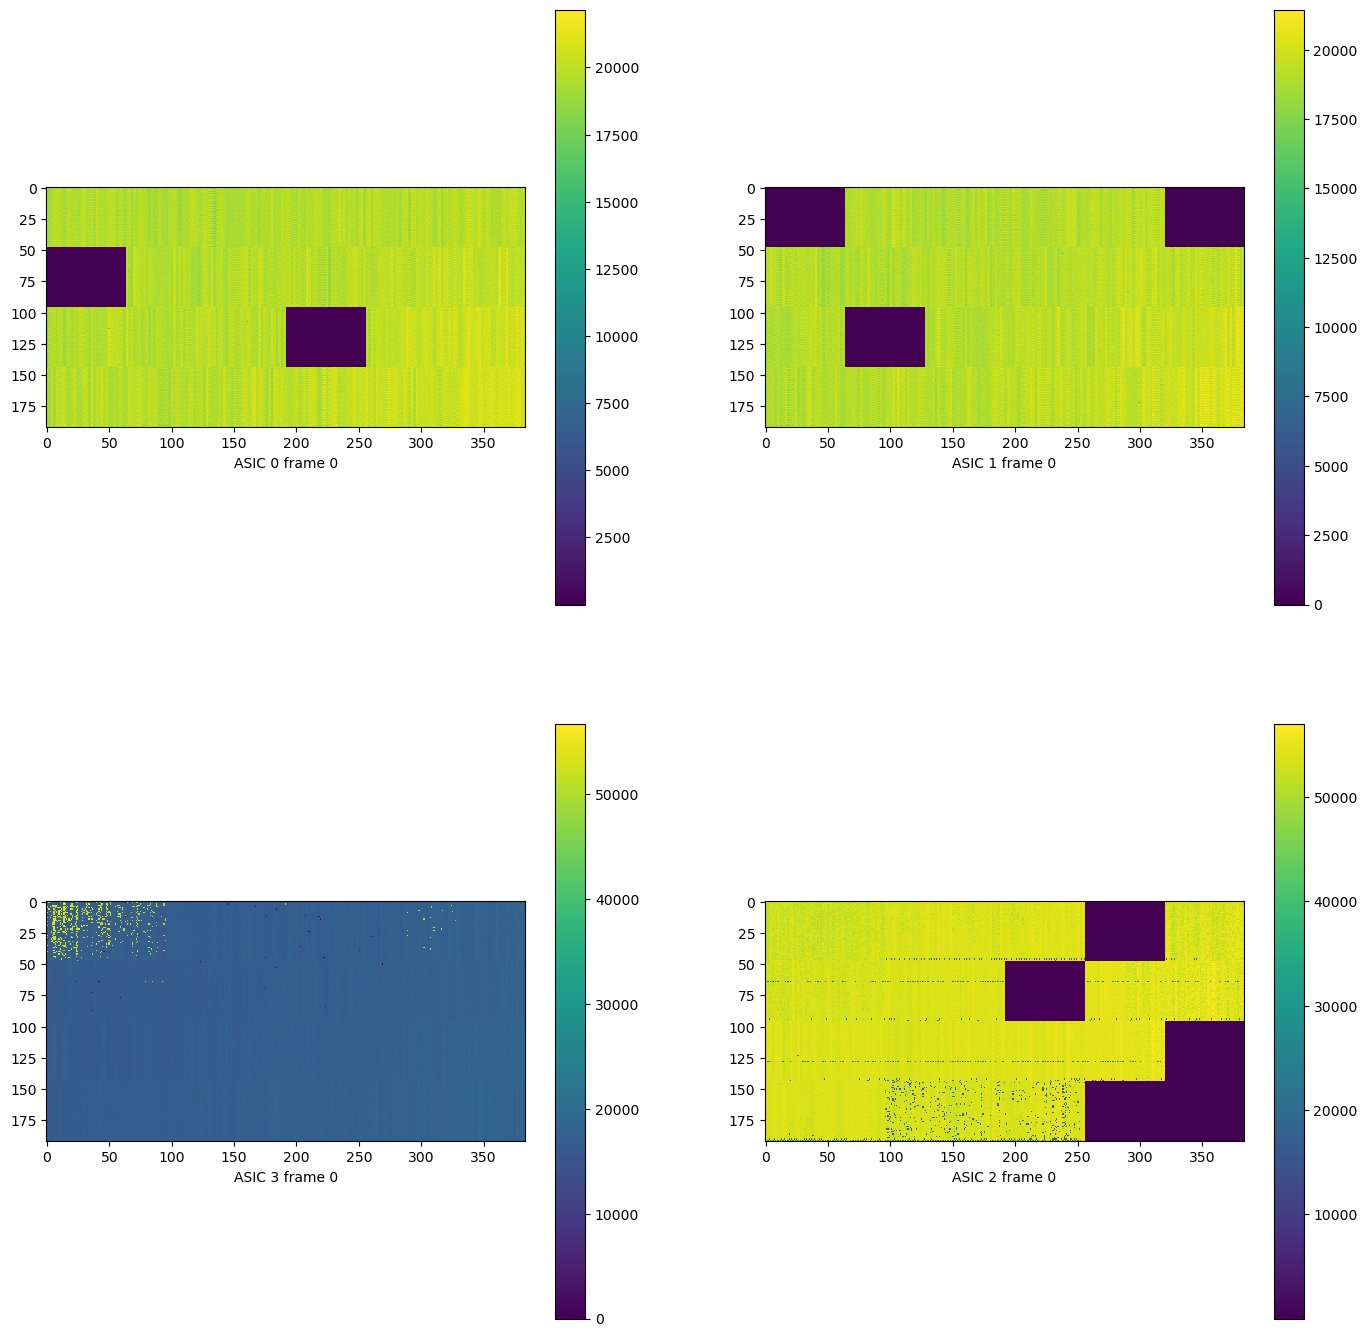

In [7]:
plt.subplots(2,2,figsize=(17,17))

plt.subplot(2,2,1)
plt.imshow(DEBUG0.getData()[:,:,0], interpolation='nearest')
plt.xlabel("ASIC 0 frame 0")
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(DEBUG1.getData()[:,:,0], interpolation='nearest')
plt.xlabel("ASIC 1 frame 0")
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(DEBUG2.getData()[:,:,0], interpolation='nearest')
plt.xlabel("ASIC 2 frame 0")
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(DEBUG3.getData()[:,:,0], interpolation='nearest')
plt.xlabel("ASIC 3 frame 0")
plt.colorbar()


# Test with flow control enabled & disabled

In [38]:
# Configure clock to 168 MHz and configures all ASICS
root.InitASIC([4,1,0,1,0])

Rysync ASIC started
Did not find specific ASIC1 file. Using generic.
Did not find specific ASIC2 file. Using generic.
Did not find specific ASIC3 file. Using generic.
Did not find specific ASIC4 file. Using generic.
Init ASIC script started
Loading PLL configuration
Loading supply configuration
Loading /afs/slac.stanford.edu/g/controls/development/users/dnajjar/sandBox/epix-hr-m-320k/software/notebook/..//config/ePixHRM320k_PowerSupply_Enable.yml
Loading lane delay configurations
Loading /afs/slac.stanford.edu/g/controls/development/users/dnajjar/sandBox/epix-hr-m-320k/software/notebook/..//config/ePixHRM320k_cb000018f0322301_SspMonGrp_carrier.yml
Loading waveforms configuration
Loading /afs/slac.stanford.edu/g/controls/development/users/dnajjar/sandBox/epix-hr-m-320k/software/notebook/..//config/ePixHRM320k_RegisterControl.yml
Loading batcher configurations
Loading /afs/slac.stanford.edu/g/controls/development/users/dnajjar/sandBox/epix-hr-m-320k/software/notebook/..//config/ePixHRM32

In [40]:
getUpStreamPpgFrmCnt()
getDownStreamPpgFrmCnt()
clearUpStreamPpg()
clearDownStreamPpg()
clearSspMonGrp()
clearDigAsicStrmReg()
getPKREGCounters([1,0,1,0])
disablePpgFlowCtrl(False)
getUpStreamPpgFrmCnt()
getDownStreamPpgFrmCnt()

Upstream pgp got 3392 frames
Upstream pgp got 3392 frames
Upstream pgp got 3392 frames
Upstream pgp got 3392 frames
Downstream pgp got 3392 frames
Downstream pgp got 3392 frames
Downstream pgp got 3392 frames
Downstream pgp got 3392 frames
DigAsicStrmRegister0 FrameCount=0 disable=0x0
DigAsicStrmRegister2 FrameCount=0 disable=0x0
Upstream pgp got 0 frames
Upstream pgp got 0 frames
Upstream pgp got 0 frames
Upstream pgp got 0 frames
Downstream pgp got 0 frames
Downstream pgp got 0 frames
Downstream pgp got 0 frames
Downstream pgp got 0 frames


In [41]:
root.enableAllAsics(True)

frames = 2000000
rate = 5000

root.hwTrigger(frames, rate)

Stop Triggers command executed
Set Auto Trigger command executed
Start Auto Trigger command executed
Triggers sent: 2000000
Stop Triggers command executed


In [42]:
getPKREGCounters([1,0,1,0])
getUpStreamPpgFrmCnt()
getDownStreamPpgFrmCnt()

DigAsicStrmRegister0 FrameCount=2000000 disable=0x0
ASIC 0 Lane 0 is having overflow of 1046
ASIC 0 Lane 1 is having overflow of 1046
ASIC 0 Lane 2 is having overflow of 1046
ASIC 0 Lane 3 is having overflow of 1046
ASIC 0 Lane 4 is having overflow of 1046
ASIC 0 Lane 5 is having overflow of 1046
ASIC 0 Lane 7 is having overflow of 1046
ASIC 0 Lane 9 is having overflow of 1046
ASIC 0 Lane 11 is having overflow of 1046
ASIC 0 Lane 12 is having overflow of 1046
ASIC 0 Lane 13 is having overflow of 1046
ASIC 0 Lane 15 is having overflow of 1046
ASIC 0 Lane 17 is having overflow of 1046
ASIC 0 Lane 19 is having overflow of 1046
ASIC 0 Lane 21 is having overflow of 1046
ASIC 0 Lane 23 is having overflow of 1046
DigAsicStrmRegister2 FrameCount=2000000 disable=0x0
Upstream pgp got 33920 frames
Upstream pgp got 33920 frames
Upstream pgp got 33920 frames
Upstream pgp got 33920 frames
Downstream pgp got 1152 frames
Downstream pgp got 1152 frames
Downstream pgp got 1152 frames
Downstream pgp got 